#DRUG PREDICTION USING DECISION TREES


##IMPORTING THE DEPENDENCIES

In [ ]:
# For basic mathematical computation
import numpy as np
# Since we are working with tabular data stored in .csv format. We are going to use the pandas library to handle that.
import pandas as pd

# For preprocessing, splitting, model and accuracy the data we are going to use the scikit-learn library

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# For generating the final decision tree we are going to use matplotlib and pydotplus
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

###READING THE CSV FILE INTO A DATAFRAME
For this we are going to use the .read_csv() function of the pandas library.

In [ ]:
df = pd.read_csv('./drug200.csv')

###EXPLORATORY DATA ANALYSIS
EDA plays a big role in any machine learning or data science project and helps the individual to gain valuable insights from the data he is working on.

Let us begin with having a look at our dataset. The .head() function is used to display the first 'n' records in the dataset with the default value of 'n' being 5

In [ ]:
df.head()

We can observe the following things from our dataset : 

*   It contains numeric values
*   It contains character values as well

One tiny problem or should I say drawback of Machine Learning and Data Science is that it only works with numeric values so we need to find a way to convert this character values to a numerical value.

To gain more insight into the values of the dataset we are going to use the .info() function available in pandas for our ready reference.

In [ ]:
df.info()

The function returns quite some important insights : 

1.   We have 200 entries in our dataset.
2.   We have no null values in the dataset.
3.   We have 4 columns that are categorical and need to converted.

Let's have a look at the number of unique values for each column.



In [ ]:
for column in df.columns:
  print(r'{} has {} unique values.'.format(column,df[column].nunique()))

As expected **Age** and **Na_to_K** being the numerical columns in the dataset contain a larger number of unique values compared to the other columns.

Let us now get the feautues and the target variable seperately. Since our objective is to predict the drug the **Drug** column is going to be our target and rest our features.

In [ ]:
features = [column for column in df.columns if column!='Drug']
TARGET = 'Drug'

##PREPROCESSING

To convert the categorical values to numerical values we are going to use the LabelEncoder module available in the sklearn preprocessing module.

Suppose you have a column containing only three unique values say : A,B and C. LabelEncoder() assigns a unique digit to these values and replaces them with the numerical value. For example :  say A is mapped to 1, B to 2 and C to 3. All the values in the column that were A will become 1, B will become 2 and same for C.

**NOTE : This preprocessing for decision tree is only done for features and not for the target variable.**

In [ ]:
# Let us first convert the age column into numercial values

# Declare the LabelEncoder for the column 'sex'
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
df['Sex']= le_sex.transform(df['Sex'])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,drugY


We can see that the values in the 'Sex' column of our dataset have been converted to numerical values of 0 and 1.

Let us do this for the rest of the categorical columns as well.

In [ ]:
# The BP column contains three unique values 'HIGH','LOW' and 'NORMAL'

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
df['BP']= le_BP.transform(df['BP'])


In [ ]:
# The Cholestrol column has only two unique values 'HIGH' and 'NORMAL'

le_ch = preprocessing.LabelEncoder()
le_ch.fit(['NORMAL', 'HIGH'])
df['Cholesterol']= le_BP.transform(df['Cholesterol'])

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


##MODEL TRAINING



### SPLITING THE DATASET INTO TRAIN AND TEST

We can see that all the features of our dataset have been converted to numerical values and are ready for our model to be trained on. 

Let us now split our dataset into train and test datasets. This will help us in determining the accuracy of our model. For this we are going to use the train_test_split() function in the scikit-learn library.

In [ ]:
# Store the dataframe values into a multi dimensional array to be given as input
X = df[features].values
y = df[TARGET].values

In [ ]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


### DECLARING THE MODEL AND TESTING


Since, all the steps before we feed the data into the model is done let us declare our model and train it on our dataset

In [ ]:
# Declare the model
drugTree = DecisionTreeClassifier()
# Fit the training data to our decision tree classifier
drugTree.fit(X_train, y_train)

PREDICT


1.   Train Dataset
2.   Test Dataset

Our model has finished training and let us now look at the accuracy it achieved. Train dataset consists of the data that the model is trained on or has already seen while the test dataset contains that data that our model has never seen before. This helps us to identify overfitting and how generalised our model is.

To test the accuracy we are going to use the accuracy_score() function in the metrics module of sklearn library

In [ ]:
preds_train = drugTree.predict(X_train)

print("Accuracy of Decision Tree is :",metrics.accuracy_score(y_train, preds_train))

WONDERFUL!!! Our model was able to classify all the inputs correctly to for our training set. Let us now have a look at our test set accuracy

In [ ]:
pred_test = drugTree.predict(X_test)

print(r"Accuracy of Decision Tree is : {:.2f}".format(metrics.accuracy_score(y_test, pred_test)*100))

98.33% Accuracy. This is amazing for a basic model like Decision Tree.

##PLOTTING THE DECISION TREE.

Plotting the decision tree helps us to visualize the predictions much more accurately even for a non-technical person.

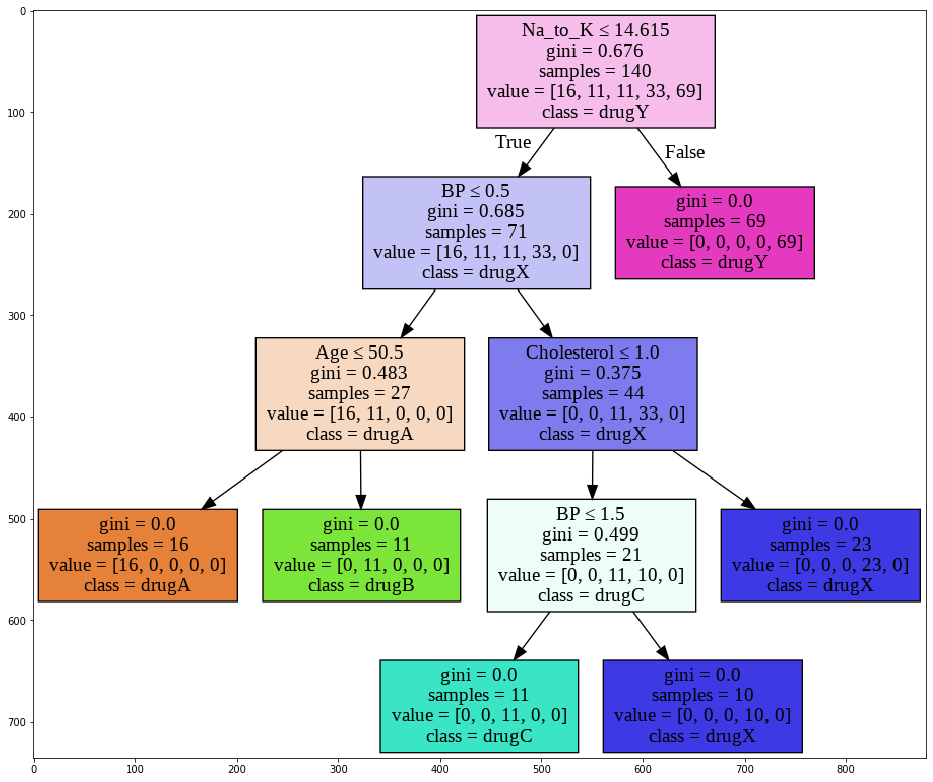

In [ ]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out = tree.export_graphviz(drugTree, feature_names=featureNames, out_file=dot_data, class_names=np.unique(
    y_train), filled=True,  special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(16, 16))
plt.imshow(img, interpolation='nearest')